In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
eplframe = pd.read_csv('results.csv')

In [3]:
eplframe.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,1.0,0.0,H,...,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,2.0,0.0,H,...,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,1.0,0.0,H,...,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,2.0,0.0,H,...,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0
10803,2020-21,2021-05-23T16:00:00Z,Wolves,Man United,1,2,A,1.0,2.0,A,...,4.0,4.0,6.0,2.0,14.0,3.0,4.0,1.0,0.0,0.0


In [4]:
#get necessary cols and only the year 2020-21
epllist = eplframe[['Season','DateTime','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
epllist = epllist[epllist['Season'] == '2020-21']
epllist = epllist.reset_index(drop=True)

In [5]:
epllist.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,2020-21,2020-09-12T12:30:00Z,Fulham,Arsenal,0,3,A
1,2020-21,2020-09-12T15:00:00Z,Crystal Palace,Southampton,1,0,H
2,2020-21,2020-09-12T17:30:00Z,Liverpool,Leeds,4,3,H
3,2020-21,2020-09-12T20:00:00Z,West Ham,Newcastle,0,2,A
4,2020-21,2020-09-13T14:00:00Z,West Brom,Leicester,0,3,A


In [6]:
#check all the Manchester United Games
manu = epllist[(epllist['HomeTeam'] == 'Man United') | (epllist['AwayTeam'] == 'Man United')]
manu = DataFrame(manu)
manu

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR
10,2020-21,2020-09-19T17:30:00Z,Man United,Crystal Palace,1,3,A
18,2020-21,2020-09-26T12:30:00Z,Brighton,Man United,2,3,A
36,2020-21,2020-10-04T16:30:00Z,Man United,Tottenham,1,6,A
41,2020-21,2020-10-17T20:00:00Z,Newcastle,Man United,1,4,A
51,2020-21,2020-10-24T17:30:00Z,Man United,Chelsea,0,0,D
64,2020-21,2020-11-01T16:30:00Z,Man United,Arsenal,0,1,A
70,2020-21,2020-11-07T12:30:00Z,Everton,Man United,1,3,A
81,2020-21,2020-11-21T20:00:00Z,Man United,West Brom,1,0,H
93,2020-21,2020-11-29T14:00:00Z,Southampton,Man United,2,3,A
100,2020-21,2020-12-05T17:30:00Z,West Ham,Man United,1,3,A


In [7]:
#catgorize into home and away games
def gamecat(games):

    if games == 'Man United':
        return 'Home'
    else:
        return 'Away'

In [8]:
manu['Games'] = manu['HomeTeam'].apply(gamecat)
manu.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Games
10,2020-21,2020-09-19T17:30:00Z,Man United,Crystal Palace,1,3,A,Home
18,2020-21,2020-09-26T12:30:00Z,Brighton,Man United,2,3,A,Away
36,2020-21,2020-10-04T16:30:00Z,Man United,Tottenham,1,6,A,Home
41,2020-21,2020-10-17T20:00:00Z,Newcastle,Man United,1,4,A,Away
51,2020-21,2020-10-24T17:30:00Z,Man United,Chelsea,0,0,D,Home


In [9]:
#put goals scored from Man United in every games
def goalscat(goals):
    FTHG, FTAG, Games = goals
    if Games == 'Home':
        return FTHG
    else:
        return FTAG

In [10]:
manu['Goals Scored'] = manu[['FTHG','FTAG','Games']].apply(goalscat,axis=1)
manu.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Games,Goals Scored
10,2020-21,2020-09-19T17:30:00Z,Man United,Crystal Palace,1,3,A,Home,1
18,2020-21,2020-09-26T12:30:00Z,Brighton,Man United,2,3,A,Away,3
36,2020-21,2020-10-04T16:30:00Z,Man United,Tottenham,1,6,A,Home,1
41,2020-21,2020-10-17T20:00:00Z,Newcastle,Man United,1,4,A,Away,4
51,2020-21,2020-10-24T17:30:00Z,Man United,Chelsea,0,0,D,Home,0


In [11]:
#add game number for better visualization
manu['Game No.'] = np.arange(1,len(manu)+1)

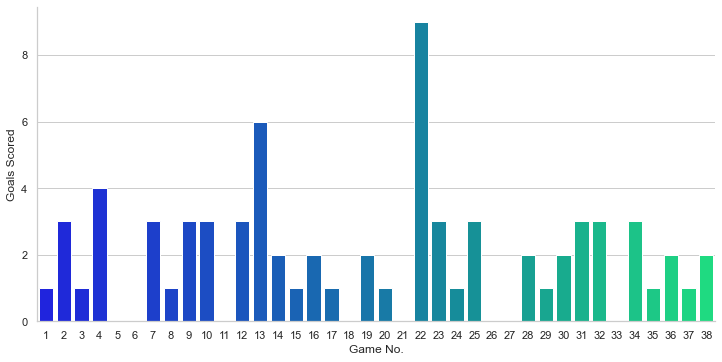

In [12]:
#check all the goals scored with plot
sns.catplot(data=manu,x='Game No.',y='Goals Scored',kind='bar',aspect=2,palette='winter')


In [13]:
#how many man united scored in 2020-21
manu['Goals Scored'].sum()

73

In [14]:
#lets also check goals conceded
def goalsconcede(goals):
    FTHG, FTAG, Games = goals
    if Games == 'Home':
        return FTAG
    else:
        return FTHG
manu['Goals Conceded'] = manu[['FTHG','FTAG','Games']].apply(goalsconcede,axis=1)
manu.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Games,Goals Scored,Game No.,Goals Conceded
10,2020-21,2020-09-19T17:30:00Z,Man United,Crystal Palace,1,3,A,Home,1,1,3
18,2020-21,2020-09-26T12:30:00Z,Brighton,Man United,2,3,A,Away,3,2,2
36,2020-21,2020-10-04T16:30:00Z,Man United,Tottenham,1,6,A,Home,1,3,6
41,2020-21,2020-10-17T20:00:00Z,Newcastle,Man United,1,4,A,Away,4,4,1
51,2020-21,2020-10-24T17:30:00Z,Man United,Chelsea,0,0,D,Home,0,5,0


In [177]:
#lets check the goals conceded and goals scored
totalgs = manu['Goals Scored'].sum()
totalgc = manu['Goals Conceded'].sum()
goals = DataFrame([[totalgs,totalgc]],columns=['Goals Scored','Goals Conceded'])
goals

,Goals Scored,Goals Conceded
0,73,44


<AxesSubplot:>

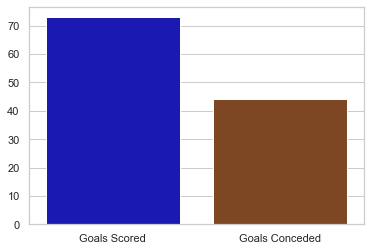

In [209]:
#check with plot
sns.barplot(data=goals, palette= ['mediumblue', 'saddlebrown'])

Text(0, 0.5, 'Goals')

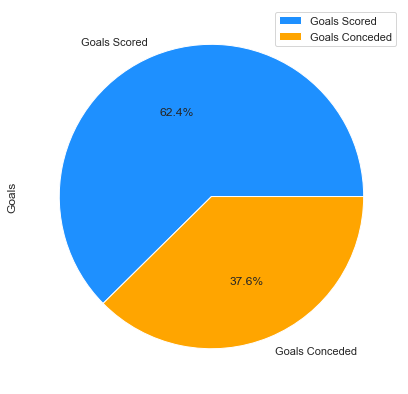

In [172]:
#lets check the goals conceded and goals scored with piechart
goals = goals.transpose() #change the cols and rows
goals.plot.pie(autopct="%.1f%%",subplots=True,figsize=(7,7),colors = ['dodgerblue', 'orange'])
plt.ylabel('Goals')

In [103]:
manu.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Games,Goals Scored,Game No.,Goals Conceded,L/W/D
10,2020-21,2020-09-19T17:30:00Z,Man United,Crystal Palace,1,3,A,Home,1,1,3,Lose
18,2020-21,2020-09-26T12:30:00Z,Brighton,Man United,2,3,A,Away,3,2,2,1
36,2020-21,2020-10-04T16:30:00Z,Man United,Tottenham,1,6,A,Home,1,3,6,Lose
41,2020-21,2020-10-17T20:00:00Z,Newcastle,Man United,1,4,A,Away,4,4,1,3
51,2020-21,2020-10-24T17:30:00Z,Man United,Chelsea,0,0,D,Home,0,5,0,Draw


In [126]:
#check man united win lose draw games
#import new col
def winlose(hagames):
    egames, agames = hagames

    if (egames-agames) == 0:
        return 'Draw'
    elif (egames-agames) > 0:
        return 'Win'
    else:
        return 'Lose'

manu['W/D/L'] = manu[['Goals Scored','Goals Conceded']].apply(winlose,axis=1)
manu.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Games,Goals Scored,Game No.,Goals Conceded,W/D/L
10,2020-21,2020-09-19T17:30:00Z,Man United,Crystal Palace,1,3,A,Home,1,1,3,Lose
18,2020-21,2020-09-26T12:30:00Z,Brighton,Man United,2,3,A,Away,3,2,2,Win
36,2020-21,2020-10-04T16:30:00Z,Man United,Tottenham,1,6,A,Home,1,3,6,Lose
41,2020-21,2020-10-17T20:00:00Z,Newcastle,Man United,1,4,A,Away,4,4,1,Win
51,2020-21,2020-10-24T17:30:00Z,Man United,Chelsea,0,0,D,Home,0,5,0,Draw


Text(2.960000000000001, 0.5, 'Games Played')

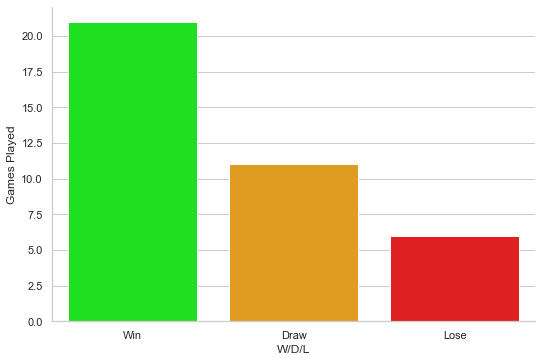

In [212]:
#check man united win/lose/draw games with plots
sns.catplot(data=manu,x='W/D/L',kind='count',aspect=1.5,order=['Win','Draw','Lose'],palette = ['lime', 'orange','red'])
plt.ylabel('Games Played')

In [269]:
#check man united win/lose/draw games
winlose = manu['W/D/L']
winlose = DataFrame(winlose)
winlose.value_counts()

W/D/L
Win      21
Draw     11
Lose      6
dtype: int64

Text(0.5, 1.0, 'Win/Draw/Lose Rate')

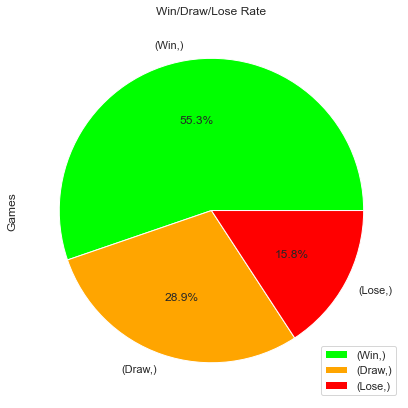

In [337]:
#check overall win/draw/lose rate
winlose.value_counts().plot.pie(autopct="%.1f%%",subplots=True,figsize=(7,7),legend=True,colors = ['lime', 'orange','red'])
plt.ylabel('Games')
plt.title('Win/Draw/Lose Rate')

In [331]:
winlose.value_counts()

W/D/L
Win      21
Draw     11
Lose      6
dtype: int64

In [332]:
wdl = winlose.value_counts()
wdl = DataFrame(wdl)
wdl = wdl.reset_index()
wdl.columns = ['W/D/L','No. Of Games']
wdl

,W/D/L,No. Of Games
0,Win,21
1,Draw,11
2,Lose,6


(0.0, 30.0)

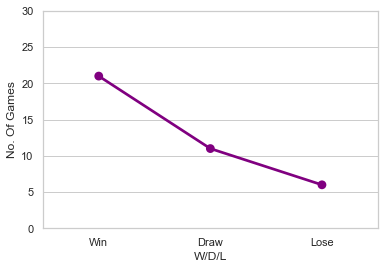

In [338]:
#check with point plot win/draw/lose games
sns.pointplot(data=wdl,x='W/D/L',y='No. Of Games',color='purple')
plt.ylim(0,30)

In [339]:
manu.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Games,Goals Scored,Game No.,Goals Conceded,W/D/L
10,2020-21,2020-09-19T17:30:00Z,Man United,Crystal Palace,1,3,A,Home,1,1,3,Lose
18,2020-21,2020-09-26T12:30:00Z,Brighton,Man United,2,3,A,Away,3,2,2,Win
36,2020-21,2020-10-04T16:30:00Z,Man United,Tottenham,1,6,A,Home,1,3,6,Lose
41,2020-21,2020-10-17T20:00:00Z,Newcastle,Man United,1,4,A,Away,4,4,1,Win
51,2020-21,2020-10-24T17:30:00Z,Man United,Chelsea,0,0,D,Home,0,5,0,Draw


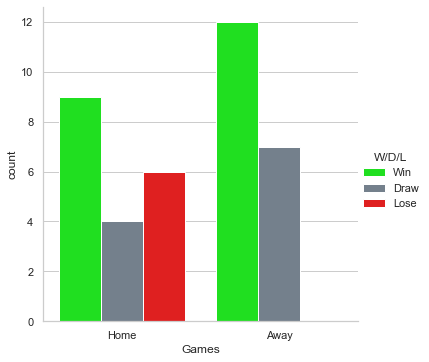

In [354]:
#how many win/draw/lose game in away and home games
sns.catplot(data=manu,x='Games',kind='count',hue='W/D/L',hue_order=['Win','Draw','Lose'],palette=["lime", "slategray", "red"])

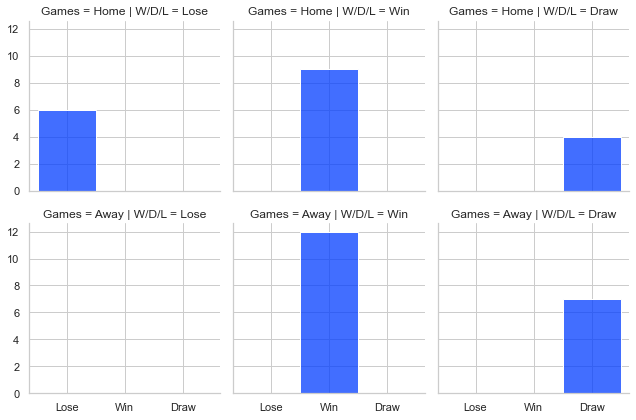

In [395]:
#how many win/draw/lose game in away and home games
sns.set(palette='bright',style="whitegrid")
allg = sns.FacetGrid(data=manu, col="W/D/L",  row="Games")
allg.map_dataframe(sns.histplot, x='W/D/L')
